In [53]:
import tweepy
import csv
from tweepy import OAuthHandler
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Consumer keys and access tokens, used for OAuth
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Open/Create a file to append data
csvFile = open('muslim_hashtag.csv', 'w')
#Use csv Writer
 
HEADER = ["screen_name","location", "language", "text", "created_at", "retweet_count", "likes_count"]
csvWriter = csv.writer(csvFile)
csvWriter.writerow(HEADER)

#request the keyword as an input
a=input("Enter your keyword to start the search: ")
#search for a hashtag/keyword and write to the CSV file
for tweet in tweepy.Cursor(api.search,q=str.lower(a), count=10000,
                           since="2020-03-01", wait_on_rate_limit=True,).items(10000):
    #print (tweet.user.screen_name, tweet.user.location, tweet.lang, tweet.text, tweet.retweet_count, tweet.favorite_count)
    csvWriter.writerow([tweet.user.screen_name, tweet.user.location, tweet.lang, tweet.text.encode('utf-8'), tweet.retweet_count, tweet.favorite_count])




Enter your keyword to start the search: islam


### Make a bar plot from the languages of the tweets

in     4321
en     4040
und     360
fr      345
tr      259
hi      155
de      118
ar      113
nl       48
ur       45
ca       30
es       30
tl       16
sv       14
ro       10
no        9
bn        6
ja        6
ru        6
da        5
it        5
ko        5
fi        3
cs        2
ta        2
sl        2
et        2
pl        1
ht        1
hu        1
fa        1
Name: language, dtype: int64


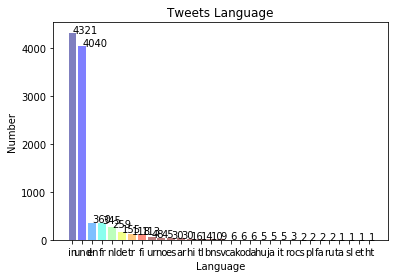

In [55]:
#Create a scatter chart with languages
df=pd.read_csv("muslim_hashtag.csv")
freq=df["language"].value_counts()
print(freq)
x=df["language"].unique()
color=[i for i in range(0, len(x))]
# Get a color map
my_cmap = cm.get_cmap('jet')
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=8)
#make a scatter plot
plt.bar(x,freq, color=my_cmap(my_norm(color)), alpha=0.5)
#add the value of each one
for index, value in enumerate(freq):
	plt.text(index, value,  str(value))
plt.ylabel("Number")
plt.xlabel("Language")
plt.title("Tweets Language")
plt.savefig('tweets_lang.pdf', dpi=100)
plt.show()

### Show the frequency of location and save it 

In [56]:
#Create a bar chart with languages
df=pd.read_csv("muslim_hashtag.csv")
freq=df["location"]
freq.dropna()
freq=freq.value_counts()
print(freq)
x=df["location"].unique()
freq.to_csv('tweets_location.csv', encoding='utf-8', header=True)


Indonesia                         246
India                             198
Malaysia                          116
Etimesgut, Türkiye                 82
New Delhi, India                   51
Mumbai, India                      51
indonesia                          45
DKI Jakarta, Indonesia             44
Jakarta                            44
Dubai, United Arab Emirates        38
Selangor, Malaysia                 37
Erzurum, Türkiye                   35
Pakistan                           32
Nigeria                            26
Kota Surabaya, Jawa Timur          24
Bengaluru, India                   23
Mumbai                             23
France                             22
Bangalore                          21
Hyderabad, India                   20
Kaduna, Nigeria                    19
New Delhi                          19
Islamabad, Pakistan                18
Kuala Lumpur                       18
भारत                               18
Bharat                             18
United State

### Extract hashtags from English tweets

In [57]:
#only english text column
df_text=df[df.language=="en"][["text"]]
df_text["text"]=df_text["text"].str.lower().str.replace("https:.*","")
hashtag=[]
for line in df_text["text"]:
    x=re.findall(r"#(\w+)", line)
    if x!=[]:
        for item in x:
            hashtag.append(item)
word_could_dict=Counter(hashtag)
print(word_could_dict)

Counter({'islam': 117, 'coronavirus': 43, 'mma': 40, 'germany': 40, 'fridaythoughts': 23, 'pandemic': 19, 'khilafahcontrolsoutbreaks': 17, 'ramadhan': 15, 'i': 14, 'quran': 13, 'muslim': 13, 'muslims': 12, 'ahmadiyya': 10, 'pakistan': 8, 'covid19': 8, 'being': 6, 'kashmir': 5, 'messiah': 5, 'bangladesh': 4, 'indian': 4, 'patriot': 4, 'saudiarabia': 4, 'wordsofwisdom': 3, 'islamic': 3, 'charity': 3, 'teamaside': 3, 'johnbrennan': 3, 'covid': 3, 'covid_19': 3, 'turkey': 3, 'allah': 3, 'godmorningthuresday': 3, 'coronacrisis': 3, 'iran': 3, 'irgcterrorists': 3, 'pakistani': 2, 'bismillah': 2, 'islamquotes': 2, 'peace': 2, 'islam_saves_life': 2, 'stayhomestaysa': 2, 'ahmadiyyatthetrueislam': 2, 'nigerian': 2, 'siyam': 2, 'trump': 2, 'america': 2, 'dajjal': 2, 'jihad': 2, 'ramadan': 2, 'humanityfirst': 2, 'punjab': 2, 'imam_ali': 2, 'godmorningtuesday': 2, 'marketingmarriage': 2, 'christianity': 2, 'women': 2, 'lockdown': 2, 'jews': 2, 'jharkhand': 2, 'mondayfunday': 2, 'internetgyan': 2, '

### Create a Wordcloud from the frequency of the hashtags

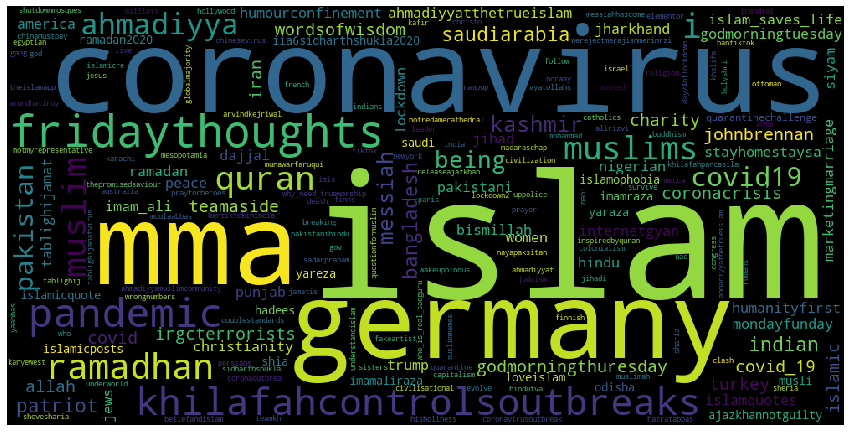

In [58]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('tweets_wordcloud.pdf', dpi=100)
plt.show()
